In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Prepared_Data/previous_application.csv")
df.head()

SK_ID_CURR  TARGET  nbr_cash_loans  nbr_revolving_loans  \
0      100002       1               0                    0   
1      100003       0               1                    0   
2      100004       0               0                    0   
3      100006       0               5                    2   
4      100007       0               4                    0   

   nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                          0                    0.000000   
1                          1                    0.100061   
2                          1                    0.212008   
3                          2                    0.163412   
4                          2                    0.159516   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   
3                      0                         1                       0   
4                      0                         0                       0   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0                0                            0   
1                0                            1   
2                0                            0   
3                0                            1   
4                1                            3   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                                1                    0   
1                                1                    2   
2                                1                    1   
3                                1                    1   
4                                1                    3   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0                      0                   1                        0.0   
1                      0                   1                        2.0   
2                      0                   0                        0.0   
3                      2                   2                        0.0   
4                      3                   0                        3.0   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0            24.0                    6.0         0.0             0.0   
1            25.0                    1.0         0.0             0.0   
2             3.0                    0.0         0.0             0.0   
3            18.0                    3.0         0.0             0.0   
4            75.0                   14.0         0.0             0.0   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0         0.0             0.0                         0.0   
1         0.0             0.0                         0.0   
2         0.0             0.0                         0.0   
3         0.0             0.0                         0.0   
4         0.0             0.0                         0.0   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                           0.0                 19.0                   0.0   
1                           0.0                 25.0                   0.0   
2                           0.0                  3.0                   0.0   
3                           0.0                 16.0                   0.0   
4                           0.0                 47.0                  16.0   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0                  0.0               0.0                          0.0   
1                  0.0               0.0                          0.0   
2                  0.0               0.0                          0.0   
3                  0.0               0.0                     270000.0   
4                  0.0               0.0             

In [3]:
df.shape

(290910, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290910 entries, 0 to 290909
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SK_ID_CURR                         290910 non-null  int64  
 1   TARGET                             290910 non-null  int64  
 2   nbr_cash_loans                     290910 non-null  int64  
 3   nbr_revolving_loans                290910 non-null  int64  
 4   nbr_loan_with_downpayment          290910 non-null  int64  
 5   avg_percentage_downpayment         290910 non-null  float64
 6   nbr_loan_rejection_HC              290910 non-null  int64  
 7   nbr_loan_rejection_LIMIT           290910 non-null  int64  
 8   nbr_loan_rejection_SCO             290910 non-null  int64  
 9   nbr_loan_walkin                    290910 non-null  int64  
 10  nbr_loan_channel_cntry_wide        290910 non-null  int64  
 11  nbr_loan_channel_stone_regional    2909

In [5]:
df = df.fillna(0)

In [6]:
df = df.replace([np.inf, -np.inf], 0)

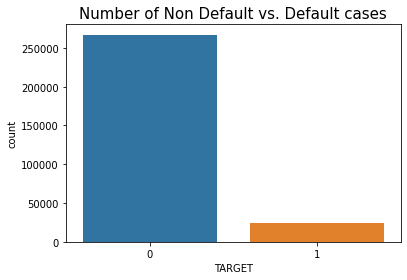

In [7]:
#Default vs. Non-Default
sns.countplot('TARGET', data=df)
plt.title('Number of Non Default vs. Default cases', fontsize = 15);

In [8]:
df.TARGET.value_counts()[1]

23834

In [9]:
print('Percentage of No Frauds: {}%'.format(round(df.TARGET.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df.TARGET.value_counts()[1]/len(df) * 100.0,2)))

Percentage of No Frauds: 91.81%
Percentage of Frauds: 8.19%


In [10]:
df.head()

SK_ID_CURR  TARGET  nbr_cash_loans  nbr_revolving_loans  \
0      100002       1               0                    0   
1      100003       0               1                    0   
2      100004       0               0                    0   
3      100006       0               5                    2   
4      100007       0               4                    0   

   nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                          0                    0.000000   
1                          1                    0.100061   
2                          1                    0.212008   
3                          2                    0.163412   
4                          2                    0.159516   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   
3                      0                         1                       0   
4                      0                         0                       0   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0                0                            0   
1                0                            1   
2                0                            0   
3                0                            1   
4                1                            3   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                                1                    0   
1                                1                    2   
2                                1                    1   
3                                1                    1   
4                                1                    3   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0                      0                   1                        0.0   
1                      0                   1                        2.0   
2                      0                   0                        0.0   
3                      2                   2                        0.0   
4                      3                   0                        3.0   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0            24.0                    6.0         0.0             0.0   
1            25.0                    1.0         0.0             0.0   
2             3.0                    0.0         0.0             0.0   
3            18.0                    3.0         0.0             0.0   
4            75.0                   14.0         0.0             0.0   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0         0.0             0.0                         0.0   
1         0.0             0.0                         0.0   
2         0.0             0.0                         0.0   
3         0.0             0.0                         0.0   
4         0.0             0.0                         0.0   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                           0.0                 19.0                   0.0   
1                           0.0                 25.0                   0.0   
2                           0.0                  3.0                   0.0   
3                           0.0                 16.0                   0.0   
4                           0.0                 47.0                  16.0   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0                  0.0               0.0                          0.0   
1                  0.0               0.0                          0.0   
2                  0.0               0.0                          0.0   
3                  0.0               0.0                     270000.0   
4                  0.0               0.0             

In [11]:
df['AMT_BALANCE_LIVE'].value_counts()

0.000         261240
130.500           50
270.000           23
67.500            17
46570.500         16
               ...  
213757.380         1
347690.565         1
464070.420         1
741208.005         1
165543.030         1
Name: AMT_BALANCE_LIVE, Length: 29429, dtype: int64

In [12]:
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
from scipy.stats import shapiro
stat, p = shapiro(df['AVG_INSTALLMENT_AMOUNT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
# q-q plot
#qqplot(df['AVG_INSTALLMENT_AMOUNT'], line='s')
#plt.show()

Statistics=0.417, p=0.000
Sample does not look Gaussian (reject H0)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']


In [14]:
X = X.drop("SK_ID_CURR", axis=1)

In [15]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)

(232728, 38)
(232728,)


In [17]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [18]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_stand.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, the shape of train_X: (232728, 38)
Before OverSampling, the shape of train_y: (232728,) 

Before OverSampling, counts of label '1': 19089
Before OverSampling, counts of label '0': 213639


In [19]:
# SMOTE OVERSAMPLING
sm = SMOTE(random_state = 2) 
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train_stand, y_train.ravel()) 

In [20]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE == 0))) 

After OverSampling, the shape of train_X: (427278, 38)
After OverSampling, the shape of train_y: (427278,) 

After OverSampling, counts of label '1': 213639
After OverSampling, counts of label '0': 213639


In [21]:
X_train_SMOTE.shape

(427278, 38)

In [22]:
cols = [1,21,17,15,16,24,28,26,32,33,]
X_train_SMOTE.drop(X_train_SMOTE.columns[cols],axis=1,inplace=True)

In [23]:
cols = [1,21,17,15,16,24,28,26,32,33,]
X_test_stand.drop(X_test_stand.columns[cols],axis=1,inplace=True)

In [24]:
second_cols = [14,24,4,5,25]
X_train_SMOTE.drop(X_train_SMOTE.columns[second_cols],axis=1,inplace=True)

In [25]:
X_test_stand.drop(X_test_stand.columns[second_cols],axis=1,inplace=True)

In [26]:
X_train_SMOTE.shape

(427278, 23)

In [27]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(max_depth = 5),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [28]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_SMOTE, y_train_SMOTE)
        cv_score = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
Logistic Regression: 60.46 : 58.53 : 60.88 : 64.41
Support Vector Classifier: 60.34 : 59.7 : 60.47 : 64.19
Decision Tree: 68.58 : 68.79 : 67.54 : 76.41
RandomForest: 78.32 : 73.52 : 81.71 : 87.06
[18:36:54] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[18:36:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:36:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:36:56] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:36:56] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[18:36:56] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/upda

In [29]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.075, 0.1] ,
     "max_depth"        : [ 1, 2, 3],
     "gamma"            : [ 0.6, 0.8, 0.9 ],
     "colsample_bytree" : [ 0.01, 0.02 , 0.1 ],
     "early_stopping_rounds": [4, 5, 6, 7 ]
     }

}

In [30]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [31]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [32]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Logistic Regression: 60.48 : 58.56 : 60.87 : 64.41


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Support Vector Classifier: 60.33 : 59.66 : 60.48 : 64.19


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Decision Tree: 64.81 : 67.75 : 64.0 : 70.15


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomForest: 70.9 : 66.77 : 72.63 : 78.66


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:05:45] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:05:45] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:05:45] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:05:45] INFO: /home/conda/feedstock_root/build_art

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

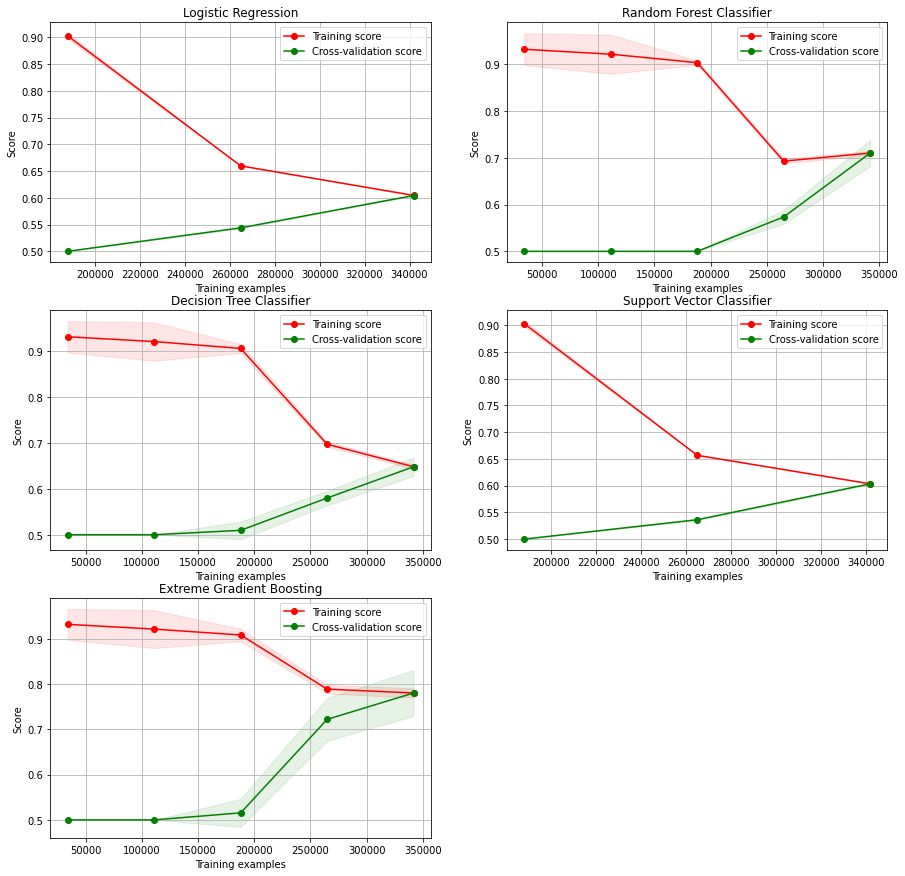

In [34]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

#plt.show()

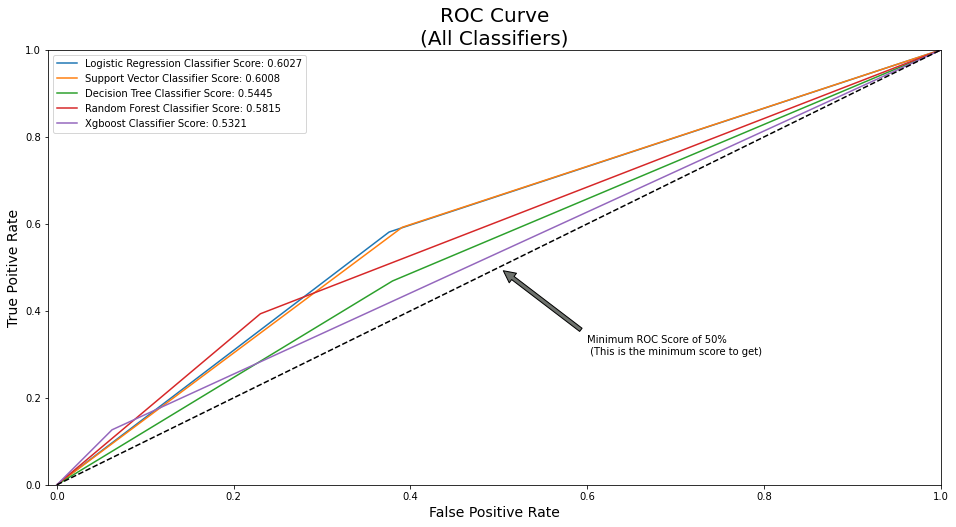

In [35]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

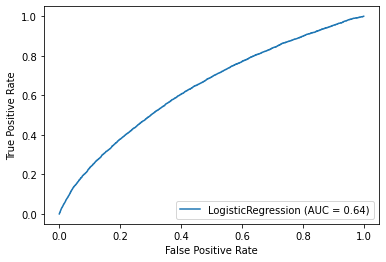

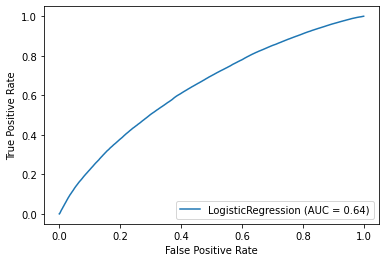

In [36]:
from sklearn import metrics
ax =metrics.plot_roc_curve(log_reg, X_test_stand, y_test)
ax =metrics.plot_roc_curve(log_reg, X_train_SMOTE, y_train_SMOTE)  
plt.show() 

In [37]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.94      0.62      0.75     53437
     Default       0.12      0.58      0.20      4745

    accuracy                           0.62     58182
   macro avg       0.53      0.60      0.48     58182
weighted avg       0.88      0.62      0.71     58182

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.94      0.61      0.74     53437
     Default       0.12      0.59      0.20      4745

    accuracy                           0.61     58182
   macro avg       0.53      0.60      0.47     58182
weighted avg       0.88      0.61      0.70     58182

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.93      0.62      0.74     53437
     Default       0.10      0.47      0.16      4745

    accuracy                           0.61     58182
   macro avg       0.51      0.54      0.45     58182
weighted av

In [38]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33355 20082]
 [ 1987  2758]]
Confusion matrix, without normalization
[[32561 20876]
 [ 1935  2810]]
Confusion matrix, without normalization
[[33149 20288]
 [ 2521  2224]]
Confusion matrix, without normalization
[[41138 12299]
 [ 2879  1866]]
Confusion matrix, without normalization
[[50106  3331]
 [ 4145   600]]
Confusion matrix, without normalization
[[53437     0]
 [    0  4745]]


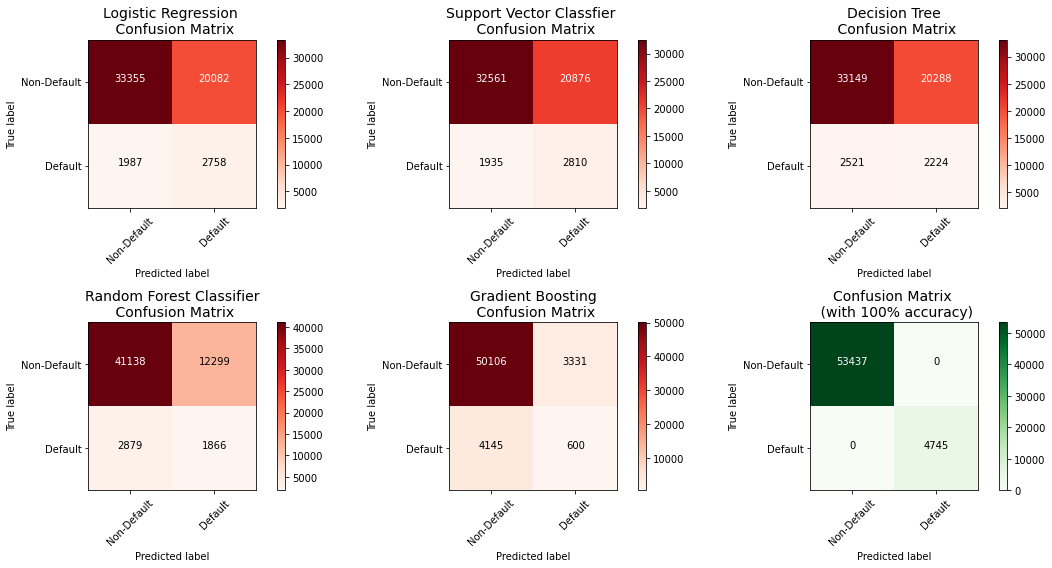

In [39]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

Logistic - Regression Feature: 0, Score: -0.01289
Logistic - Regression Feature: 1, Score: -0.08730
Logistic - Regression Feature: 2, Score: -0.13493
Logistic - Regression Feature: 3, Score: 0.10925
Logistic - Regression Feature: 4, Score: 0.09156
Logistic - Regression Feature: 5, Score: 0.08429
Logistic - Regression Feature: 6, Score: 0.04552
Logistic - Regression Feature: 7, Score: -0.07964
Logistic - Regression Feature: 8, Score: 0.09282
Logistic - Regression Feature: 9, Score: -0.26696
Logistic - Regression Feature: 10, Score: -0.01438
Logistic - Regression Feature: 11, Score: 0.10028
Logistic - Regression Feature: 12, Score: 0.04466
Logistic - Regression Feature: 13, Score: 0.11397
Logistic - Regression Feature: 14, Score: -0.34758
Logistic - Regression Feature: 15, Score: 0.06133
Logistic - Regression Feature: 16, Score: 0.06803
Logistic - Regression Feature: 17, Score: -0.01231
Logistic - Regression Feature: 18, Score: -0.10203
Logistic - Regression Feature: 19, Score: -0.07530


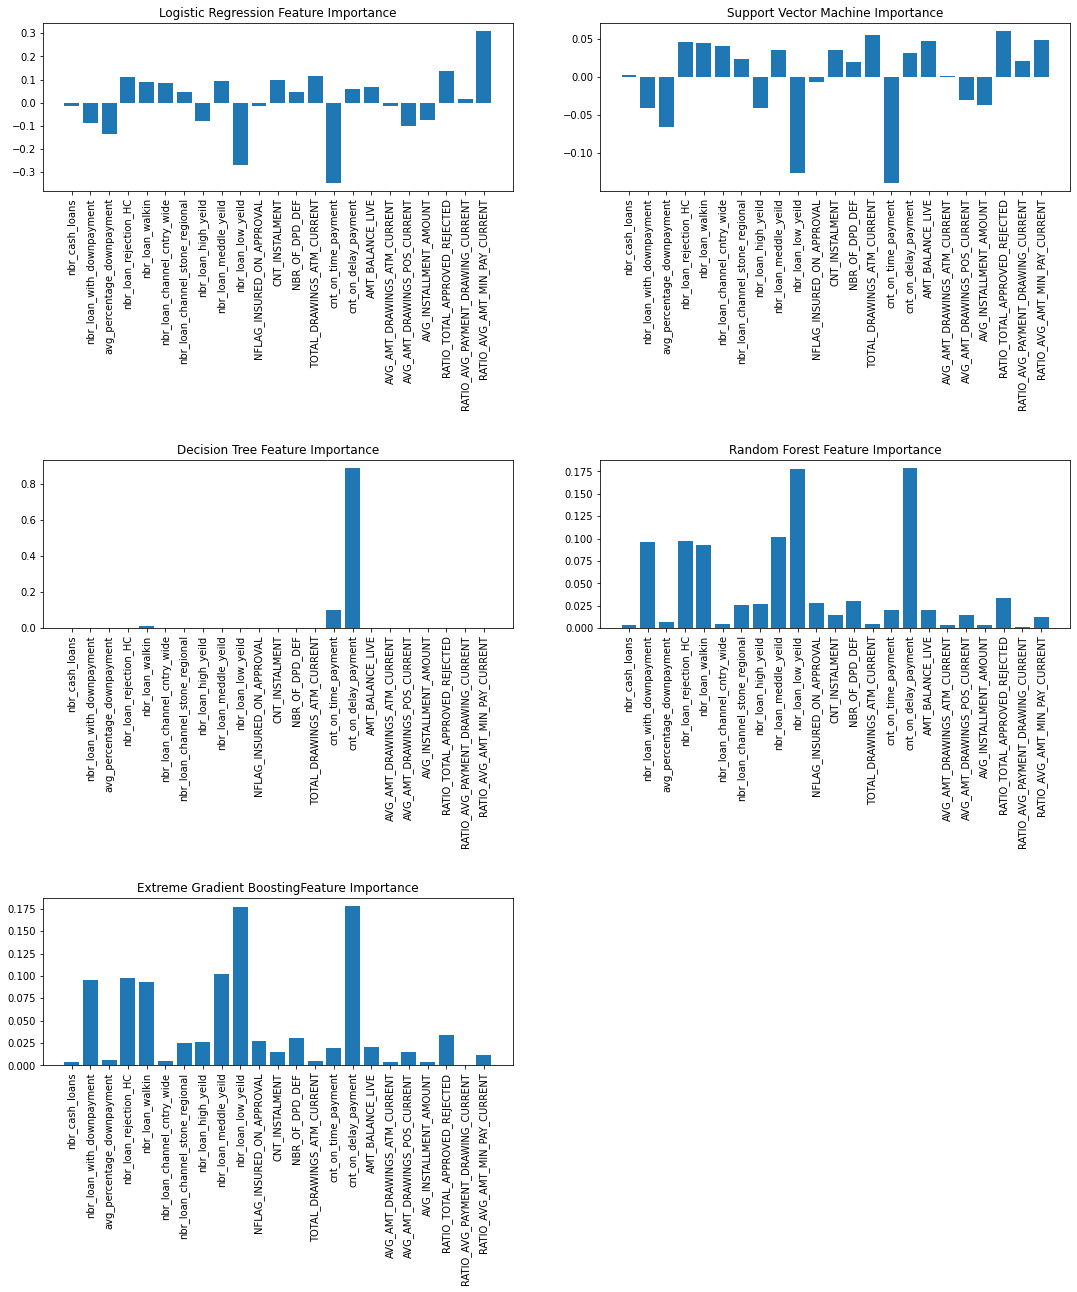

(14, 24, 4, 5, 25)

In [40]:
cols = list(X_train_SMOTE.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()


14,24,4,5,25

In [41]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [42]:
feature_names = X_train_SMOTE.columns

In [43]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [44]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [45]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)
exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.5243061165914114
Prediction_local [0.50327078]
Right: 1.1935138654264952e-307
Intercept 0.5223483681522002
Prediction_local [0.48023375]
Right: 2.3080437556731827e-151
Intercept 0.6563833660384363
Prediction_local [0.60258414]
Right: 0.576077955491206
Intercept 0.746631016857716
Prediction_local [0.62404154]
Right: 0.6484456299571139
Intercept 0.9096431317115168
Prediction_local [0.78729144]
Right: 0.8146736025810242


In [46]:
exp_lg.show_in_notebook()

In [47]:
exp_dt.show_in_notebook()

In [48]:
exp_rf.show_in_notebook()

In [49]:
exp_xgboost.show_in_notebook()

In [50]:
X_train.head()

nbr_cash_loans  nbr_revolving_loans  nbr_loan_with_downpayment  \
139808               5                    0                          0   
277937               0                    0                          1   
36390                0                    0                          0   
272088               0                    0                          1   
465                  1                    1                          1   

        avg_percentage_downpayment  nbr_loan_rejection_HC  \
139808                    0.000000                      0   
277937                    0.099455                      0   
36390                     0.000000                      0   
272088                    0.171169                      0   
465                       0.200848                      0   

        nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  nbr_loan_walkin  \
139808                         1                       0                3   
277937                         0                       0                0   
36390                          0                       0                0   
272088                         0                       0                0   
465                            0                       0                0   

        nbr_loan_channel_cntry_wide  nbr_loan_channel_stone_regional  \
139808                            1                                0   
277937                            0                                1   
36390                             1                                0   
272088                            1                                0   
465                               1                                0   

        nbr_loan_high_yeild  nbr_loan_meddle_yeild  nbr_loan_low_yeild  \
139808                    1                      3                   1   
277937                    0                      0                   1   
36390                     1                      0                   0   
272088                    0                      1                   0   
465                       1                      0                   0   

        NFLAG_INSURED_ON_APPROVAL  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
139808                        3.0            50.0                    0.0   
277937                        0.0            12.0                    0.0   
36390                         0.0            12.0                    0.0   
272088                        0.0            12.0                    0.0   
465                           0.0            12.0                    1.0   

        SK_DPD_POS  SK_DPD_DEF_POS  NBR_OF_DPD  NBR_OF_DPD_DEF  \
139808         0.0             0.0         0.0             0.0   
277937         0.0             0.0         0.0             0.0   
36390          0.0             0.0         0.0             0.0   
272088         0.0             0.0         0.0             0.0   
465            0.0             0.0         0.0             0.0   

        TOTAL_DRAWINGS_ATM_CURRENT  TOTAL_DRAWINGS_OTHER_CURRENT  \
139808                         0.0                           0.0   
277937                         0.0                           0.0   
36390                          0.0                           0.0   
272088                         0.0                           0.0   
465                            0.0                           0.0   

        cnt_on_time_payment  cnt_on_delay_payment  cnt_partial_payment  \
139808                 50.0                   0.0                  0.0   
277937                 12.0                   0.0                  0.0   
36390                  12.0                   0.0                  0.0   
272088                  8.0                   4.0                  0.0   
465                    12.0                   0.0                  0.0   

        AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
139808               0.0                          0.0   
277937               0.0         

In [51]:
final_cols = X_train_SMOTE.columns
final_cols

Index(['nbr_cash_loans', 'nbr_loan_with_downpayment',
       'avg_percentage_downpayment', 'nbr_loan_rejection_HC',
       'nbr_loan_walkin', 'nbr_loan_channel_cntry_wide',
       'nbr_loan_channel_stone_regional', 'nbr_loan_high_yeild',
       'nbr_loan_meddle_yeild', 'nbr_loan_low_yeild',
       'NFLAG_INSURED_ON_APPROVAL', 'CNT_INSTALMENT', 'NBR_OF_DPD_DEF',
       'TOTAL_DRAWINGS_ATM_CURRENT', 'cnt_on_time_payment',
       'cnt_on_delay_payment', 'AMT_BALANCE_LIVE',
       'AVG_AMT_DRAWINGS_ATM_CURRENT', 'AVG_AMT_DRAWINGS_POS_CURRENT',
       'AVG_INSTALLMENT_AMOUNT', 'RATIO_TOTAL_APPROVED_REJECTED',
       'RATIO_AVG_PAYMENT_DRAWING_CURRENT', 'RATIO_AVG_AMT_MIN_PAY_CURRENT'],
      dtype='object')

In [52]:
df_stand = df.copy()

In [53]:
for i in num_cols:    
    # transform the testing data column
    df_stand[i] = scale.transform(df[[i]])
df_stand.head()

SK_ID_CURR  TARGET  nbr_cash_loans  nbr_revolving_loans  \
0      100002       1       -0.252442            -0.252442   
1      100003       0       -0.177305            -0.252442   
2      100004       0       -0.252442            -0.252442   
3      100006       0        0.123243            -0.102168   
4      100007       0        0.048106            -0.252442   

   nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                  -0.252442                   -0.252442   
1                  -0.177305                   -0.244924   
2                  -0.177305                   -0.236513   
3                  -0.102168                   -0.240164   
4                  -0.102168                   -0.240457   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0              -0.252442                 -0.252442               -0.252442   
1              -0.252442                 -0.252442               -0.252442   
2              -0.252442                 -0.252442               -0.252442   
3              -0.252442                 -0.177305               -0.252442   
4              -0.252442                 -0.252442               -0.252442   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0        -0.252442                    -0.252442   
1        -0.252442                    -0.177305   
2        -0.252442                    -0.252442   
3        -0.252442                    -0.177305   
4        -0.177305                    -0.027031   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                        -0.177305            -0.252442   
1                        -0.177305            -0.102168   
2                        -0.177305            -0.177305   
3                        -0.177305            -0.177305   
4                        -0.177305            -0.027031   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0              -0.252442           -0.177305                  -0.252442   
1              -0.252442           -0.177305                  -0.102168   
2              -0.252442           -0.252442                  -0.252442   
3              -0.102168           -0.102168                  -0.252442   
4              -0.027031           -0.252442                  -0.027031   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0        1.550844               0.198380   -0.252442       -0.252442   
1        1.625981              -0.177305   -0.252442       -0.252442   
2       -0.027031              -0.252442   -0.252442       -0.252442   
3        1.100023              -0.027031   -0.252442       -0.252442   
4        5.382828               0.799475   -0.252442       -0.252442   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0   -0.252442       -0.252442                   -0.252442   
1   -0.252442       -0.252442                   -0.252442   
2   -0.252442       -0.252442                   -0.252442   
3   -0.252442       -0.252442                   -0.252442   
4   -0.252442       -0.252442                   -0.252442   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                     -0.252442             1.175160             -0.252442   
1                     -0.252442             1.625981             -0.252442   
2                     -0.252442            -0.027031             -0.252442   
3                     -0.252442             0.949749             -0.252442   
4                     -0.252442             3.278994              0.949749   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0            -0.252442         -0.252442                    -0.252442   
1            -0.252442         -0.252442                    -0.252442   
2            -0.252442         -0.252442                    -0.252442   
3            -0.252442         -0.252442                 20286.721708   
4            -0.252442         -0.252442             

In [54]:
# Final  Model - XgBoost
Xgboost_final_pred = pd.DataFrame(xgboost.predict_proba(df_stand[final_cols]),columns = ["DEFAULT_SCORE", "NON_DEFAULT"])

In [55]:
Behavioral_score = pd.merge(Xgboost_final_pred, df, left_index=True, right_index=True)
Behavioral_score.head()

DEFAULT_SCORE  NON_DEFAULT  SK_ID_CURR  TARGET  nbr_cash_loans  \
0       0.084650     0.915350      100002       1               0   
1       0.054123     0.945877      100003       0               1   
2       0.084650     0.915350      100004       0               0   
3       0.054123     0.945877      100006       0               5   
4       0.084221     0.915779      100007       0               4   

   nbr_revolving_loans  nbr_loan_with_downpayment  avg_percentage_downpayment  \
0                    0                          0                    0.000000   
1                    0                          1                    0.100061   
2                    0                          1                    0.212008   
3                    2                          2                    0.163412   
4                    0                          2                    0.159516   

   nbr_loan_rejection_HC  nbr_loan_rejection_LIMIT  nbr_loan_rejection_SCO  \
0                      0                         0                       0   
1                      0                         0                       0   
2                      0                         0                       0   
3                      0                         1                       0   
4                      0                         0                       0   

   nbr_loan_walkin  nbr_loan_channel_cntry_wide  \
0                0                            0   
1                0                            1   
2                0                            0   
3                0                            1   
4                1                            3   

   nbr_loan_channel_stone_regional  nbr_loan_high_yeild  \
0                                1                    0   
1                                1                    2   
2                                1                    1   
3                                1                    1   
4                                1                    3   

   nbr_loan_meddle_yeild  nbr_loan_low_yeild  NFLAG_INSURED_ON_APPROVAL  \
0                      0                   1                        0.0   
1                      0                   1                        2.0   
2                      0                   0                        0.0   
3                      2                   2                        0.0   
4                      3                   0                        3.0   

   CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD_POS  SK_DPD_DEF_POS  \
0            24.0                    6.0         0.0             0.0   
1            25.0                    1.0         0.0             0.0   
2             3.0                    0.0         0.0             0.0   
3            18.0                    3.0         0.0             0.0   
4            75.0                   14.0         0.0             0.0   

   NBR_OF_DPD  NBR_OF_DPD_DEF  TOTAL_DRAWINGS_ATM_CURRENT  \
0         0.0             0.0                         0.0   
1         0.0             0.0                         0.0   
2         0.0             0.0                         0.0   
3         0.0             0.0                         0.0   
4         0.0             0.0                         0.0   

   TOTAL_DRAWINGS_OTHER_CURRENT  cnt_on_time_payment  cnt_on_delay_payment  \
0                           0.0                 19.0                   0.0   
1                           0.0                 25.0                   0.0   
2                           0.0                  3.0                   0.0   
3                           0.0                 16.0                   0.0   
4                           0.0                 47.0                  16.0   

   cnt_partial_payment  AMT_BALANCE_LIVE  AVG_AMT_CREDIT_LIMIT_ACTUAL  \
0                  0.0               0.0                          0.0   
1                  0.0               0.0                          0.0   
2                  0.0         

In [56]:
Behavioral_score = Behavioral_score[["SK_ID_CURR","DEFAULT_SCORE", "TARGET"]]

In [57]:
Behavioral_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0      100002       0.084650       1
1      100003       0.054123       0
2      100004       0.084650       0
3      100006       0.054123       0
4      100007       0.084221       0

In [58]:
Behavioral_score.to_csv("Scores/behavioral_score.csv", index= False)